In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Data

In [2]:
#here we have cleaned data from the prior work of data cleaning and exploration data
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# column names
#list(df.columns)
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [5]:
# number of data points
#df.shape
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 45 columns


# Task 1:

#### Top 10 handsets used by the customers

In [6]:
# The top 10 handsets used by the customers
top10_handsets_customers = df[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

,Handset Type,Total
316,Huawei B528S-23A,10641
53,Apple iPhone 6S (A1688),6765
1395,undefined,6716
49,Apple iPhone 6 (A1586),6271
59,Apple iPhone 7 (A1778),4721
73,Apple iPhone Se (A1723),3764
66,Apple iPhone 8 (A1905),3550
955,Samsung Galaxy S8 (Sm-G950F),3275
78,Apple iPhone Xr (A2105),3077
888,Samsung Galaxy J5 (Sm-J530),2760


#### top 3 handset manufacturers

In [7]:
# top 3 handset manufacturers
top3_handset_manufacturers = df[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

,Handset Manufacturer,IMSI
0,Apple,42687
1,Samsung,30980
2,Huawei,21742


#### top 5 handsets per top 3 handset manufacturer

#### top 5 handset manfacturer for Apple

In [8]:
# top 5 handset manfacturer for Apple
Apple_handsets = df[df['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

,Handset Type,IMSI
0,Apple iPhone 6S (A1688),6765
1,Apple iPhone 6 (A1586),6271
2,Apple iPhone 7 (A1778),4721
3,Apple iPhone Se (A1723),3764
4,Apple iPhone 8 (A1905),3550


#### top 5 handset manfacturer for Huawei

In [9]:
# top 5 handset manfacturer for Huawei
Huawei_handsets = df[df['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

,Handset Type,IMSI
0,Huawei B528S-23A,10638
1,Huawei P20 Lite Huawei Nova 3E,1534
2,Huawei E5180,1185
3,Huawei P20,1110
4,Huawei Y6 2018,757


#### top 5 handset manfacturer for Samsung

In [10]:
#top 5 handset manfacturer for Samsung
Samsung_handset = df[df['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

,Handset Type,IMSI
0,Samsung Galaxy S8 (Sm-G950F),3275
1,Samsung Galaxy J5 (Sm-J530),2760
2,Samsung Galaxy A5 Sm-A520F,2721
3,Samsung Galaxy J3 (Sm-J330),2606
4,Samsung Galaxy S7 (Sm-G930X),2310


#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those

applications.

Aggregate per user the following information in the column

    *   number of xDR sessions
    *   Session duration
    *   the total download (DL) and upload (UL) data
    *   the total data volume (in Bytes) during this session for each application



##### number of xDR sessions

In [11]:
number_of_xDR_sessions = df.groupby('MSISDN/Number')
number_of_xDR_sessions.agg({"Bearer Id": "count"})

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


#### Session duration

In [12]:
#Session duration
session_duration = df.groupby('MSISDN/Number')
session_duration.agg({"Dur. (ms)": "sum"})

,Dur. (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,37104.0
...,...
3.379000e+10,8810.0
3.379000e+10,140988.0
3.197021e+12,244912.0


#### the total download (DL) and upload (UL) data

In [13]:
# the total download (DL) and upload (UL) data
total_DL_UL = df.groupby(['IMSI'])[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
total_DL_UL.head(5)

,Total UL (Bytes),Total DL (Bytes)
IMSI,,
2.040471e+14,60456049.0,78697597.0
2.040808e+14,37295915.0,194828056.0
2.082001e+14,53794658.0,31376981.0
2.082001e+14,33583272.0,392918313.0
2.082001e+14,71325004.0,961767023.0


#### upper and lower boundries

In [14]:
"""
calculate the boundaries outside which sit the outliers
for a Gaussian distribution
"""
def normal_boundaries(df, variable, distance):
    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()
    return upper_boundary, lower_boundary

In [15]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(df, 'Dur. (ms)', 1.5)
dur_upper_limit, dur_lower_limit

(188198.29631618026, 10945.718857051921)

In [16]:
# Replacing the outliers by the maximum and minimum limit
df['Dur. (ms)']= np.where(df['Dur. (ms)'] > dur_upper_limit, dur_upper_limit,\
                       np.where(df['Dur. (ms)'] < dur_lower_limit, dur_lower_limit, df['Dur. (ms)']))

#### Total data volume

In [17]:
x = df['Total_data'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
x.describe()

count    1.500010e+05
mean     4.957620e+08
std      2.443832e+08
min      2.895611e+07
25%      2.844744e+08
50%      4.968610e+08
75%      7.065054e+08
max      9.559848e+08
dtype: float64

In [18]:
# Analyze the basic metrics (mean, median, etc) in the Dataset
grouped_data= df.groupby('MSISDN/Number')
grouped_data.agg('Total_data').describe()

,count,mean,std,min,25%,50%,75%,max
MSISDN/Number,,,,,,,,
3.360100e+10,1.0,878690574.0,NaN,878690574.0,878690574.0,878690574.0,878690574.0,878690574.0
3.360100e+10,1.0,156859643.0,NaN,156859643.0,156859643.0,156859643.0,156859643.0,156859643.0
3.360100e+10,1.0,595966483.0,NaN,595966483.0,595966483.0,595966483.0,595966483.0,595966483.0
3.360101e+10,1.0,422320698.0,NaN,422320698.0,422320698.0,422320698.0,422320698.0,422320698.0
3.360101e+10,2.0,728705472.0,2.024123e+08,585578364.0,657141918.0,728705472.0,800269026.0,871832580.0
...,...,...,...,...,...,...,...,...
3.379000e+10,1.0,714641641.0,NaN,714641641.0,714641641.0,714641641.0,714641641.0,714641641.0
3.379000e+10,1.0,480307335.0,NaN,480307335.0,480307335.0,480307335.0,480307335.0,480307335.0
3.197021e+12,1.0,232123971.0,NaN,232123971.0,232123971.0,232123971.0,232123971.0,232123971.0


In [19]:
# total data
def total_data(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    df['Total'] = df[cols[14]] + df[cols[15]]
    return df
data = total_data(df)

In [20]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total DL (Bytes),Total_data,Social Media,Google,Email,Youtube,Netflix,Gaming,Other,Total
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,188198.296316,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,308879636.0,345629377.0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,188198.296316,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,653384965.0,707185356.0,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,188198.296316,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,279807335.0,307690973.0,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,188198.296316,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,846028530.0,889352748.0,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,188198.296316,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,569138589.0,607681403.0,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,574175259.0,631804110.0,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,631804110.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,666648844.0,705783925.0,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,705783925.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,592786405.0,627698629.0,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,627698629.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,371895920.0,401522016.0,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,401522016.0


#### Total data volume (in Bytes) for Email

In [21]:
email_data = data['Email']
email_data

0        3,701,304.00
1          937,385.00
2        3,363,124.00
3        2,070,983.00
4        2,110,349.00
             ...     
149996     690,876.00
149997   2,121,718.00
149998   2,058,277.00
149999   2,850,914.00
150000   2,259,102.31
Name: Email, Length: 150001, dtype: float64

In [22]:
email_data.describe()

count     150,001.00
mean    2,259,102.31
std     1,071,109.06
min         8,359.00
25%     1,359,344.00
50%     2,263,567.00
75%     3,159,818.00
max     4,518,036.00
Name: Email, dtype: float64

<Axes: >

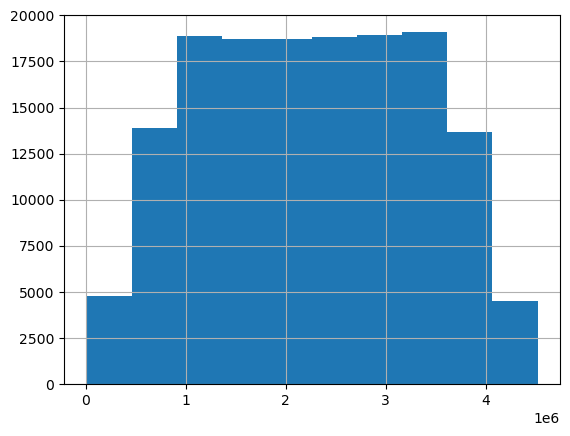

In [23]:
email_data.hist()

#### Total data volume (in Bytes) for Social media

In [24]:
social_data = data['Social Media']
social_data 

0        1,570,185.00
1        1,933,278.00
2        1,726,277.00
3          657,493.00
4          912,788.00
             ...     
149996   3,517,065.00
149997   2,352,181.00
149998   1,260,239.00
149999     823,109.00
150000   1,828,250.21
Name: Social Media, Length: 150001, dtype: float64

In [25]:
social_data.describe()

count     150,001.00
mean    1,828,250.21
std     1,035,646.14
min         1,563.00
25%       932,218.00
50%     1,826,471.00
75%     2,727,487.00
max     3,650,861.00
Name: Social Media, dtype: float64

<Axes: >

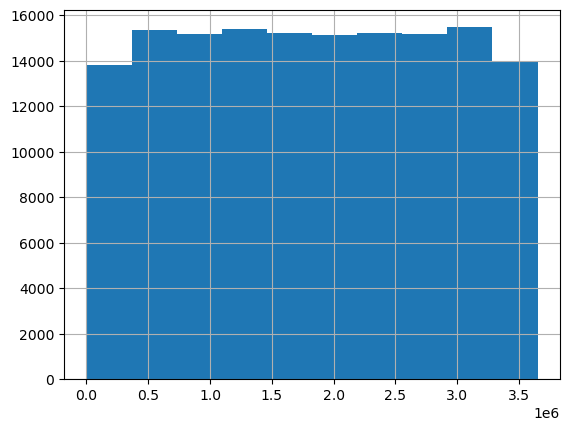

In [26]:
social_data.hist()

#### Total data volume (in Bytes) for Google

In [27]:
google_data = data['Google']
google_data 

0         2,905,912.00
1         4,414,096.00
2        10,229,119.00
3        11,811,761.00
4         7,748,843.00
              ...     
149996   12,784,914.00
149997    4,415,361.00
149998    6,585,469.00
149999    7,757,267.00
150000    7,807,294.55
Name: Google, Length: 150001, dtype: float64

In [28]:
google_data.describe()

count      150,001.00
mean     7,807,294.55
std      3,516,420.24
min         40,330.00
25%      4,943,599.00
50%      7,812,835.00
75%     10,682,796.00
max     15,528,782.00
Name: Google, dtype: float64

<Axes: >

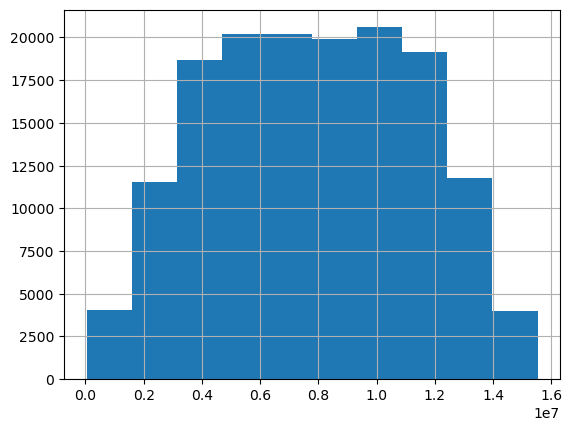

In [29]:
google_data.hist()

#### Total data volume (in Bytes) for Youtube

In [30]:
youtube_data = data['Youtube']
youtube_data

0        18,355,943.00
1        39,359,124.00
2        34,425,237.00
3        36,534,765.00
4        34,222,253.00
              ...     
149996   27,955,095.00
149997   22,165,518.00
149998   24,516,413.00
149999   17,122,508.00
150000   22,643,482.64
Name: Youtube, Length: 150001, dtype: float64

In [31]:
youtube_data.describe()

count      150,001.00
mean    22,643,482.64
std      9,246,800.31
min         78,903.00
25%     15,998,463.00
50%     22,661,770.00
75%     29,292,604.00
max     45,190,078.00
Name: Youtube, dtype: float64

<Axes: >

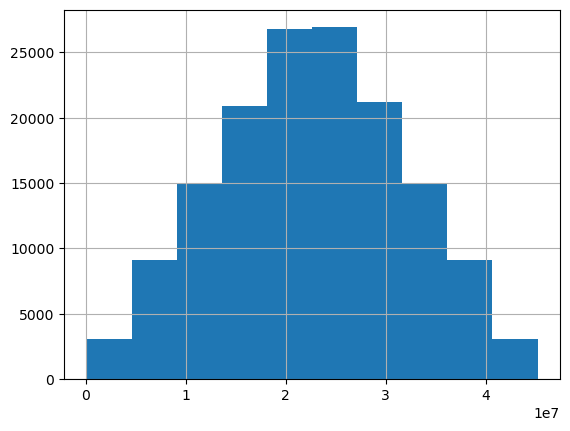

In [32]:
youtube_data.hist()

#### Total data volume (in Bytes) for Netflix

In [33]:
netflix_data = data['Netflix']
netflix_data

0        17,855,187.00
1        35,565,545.00
2        23,751,202.00
3        15,092,588.00
4        17,539,799.00
              ...     
149996   37,561,864.00
149997   40,643,294.00
149998   15,029,702.00
149999   16,494,842.00
150000   22,628,606.54
Name: Netflix, Length: 150001, dtype: float64

In [34]:
netflix_data.describe()

count      150,001.00
mean    22,628,606.54
std      9,260,820.09
min         98,432.00
25%     15,979,455.00
50%     22,635,545.00
75%     29,290,445.00
max     45,198,153.00
Name: Netflix, dtype: float64

<Axes: >

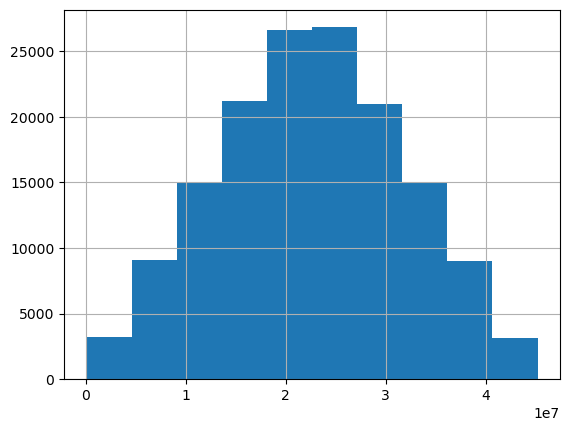

In [35]:
netflix_data.hist()

#### Total data volume (in Bytes) for Gaming

In [36]:
gaming_data = data['Gaming']
gaming_data

0        292,426,453.00
1        609,920,783.00
2        229,980,251.00
3        810,387,875.00
4        531,237,049.00
              ...      
149996   535,806,880.00
149997   631,628,095.00
149998   566,933,800.00
149999   355,066,446.00
150000   430,333,100.71
Name: Gaming, Length: 150001, dtype: float64

In [37]:
gaming_data.describe()

count       150,001.00
mean    430,333,100.71
std     244,019,924.02
min         306,358.00
25%     218,727,939.00
50%     431,614,977.00
75%     641,415,878.00
max     859,202,784.00
Name: Gaming, dtype: float64

<Axes: >

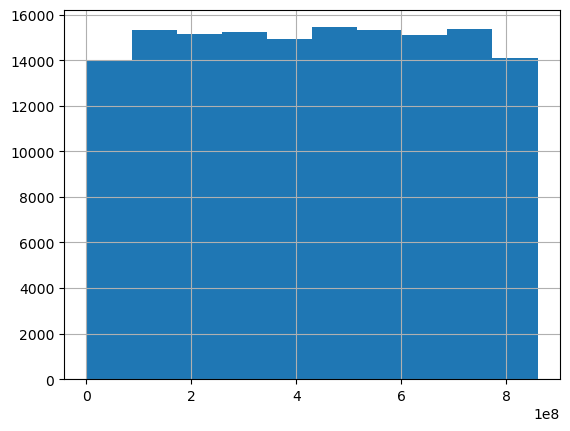

In [38]:
gaming_data.hist()

#### Dimensionality Reduction – 
perform a principal component analysis to reduce the dimensions of data

In [39]:
# Perform PCA
dim_df = data.select_dtypes(exclude='object').groupby('MSISDN/Number').sum()
pca_scaled = StandardScaler().fit_transform(X=dim_df)
pca = PCA(n_components=4)
pca.fit(pca_scaled)
score = pca.transform(pca_scaled)


principalDf = pd.DataFrame(data = score
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
principalDf.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.85,0.50,0.01,0.04
1,-1.14,0.44,0.01,0.05
2,-0.87,0.53,0.02,0.05
3,-1.48,0.31,0.02,-0.02
4,1.70,-0.70,0.32,-1.28


In [40]:
#Variance
pca.explained_variance_

array([38.25652995,  3.27557089,  1.22221814,  0.73128669])